## Getting the features 

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters
from tsfresh.utilities.dataframe_functions import impute
import numpy as np
import pandas as pd
# Extracting features of concatenated training and test dataset (need to do this in one go so the feature extraction is consistent)
# df_train = pd.read_parquet('processed-data/processed-set-a.parquet').drop(columns=["ICUType"])
df_test = pd.read_parquet('processed-data/processed-set-b.parquet').drop(columns=["ICUType"])

# print(df_train.shape)
print(df_test.shape)

# df_train = df_train.fillna(0)
df_test = df_test.fillna(0)
# For most param - distribution is normal distribution 
custom_fc_parameters = {
    "mean": None,
    "standard_deviation": None,
}

# things that are not : AST, ALT,Bilirubin- spike at lower values, high is bad 
# GCS means alert - low is unconscious 
# MechVent 1 is bad - on ventilator 
kind_to_fc_parameters = {
    "Weight": {"mean":None},
    "Age":{"maximum":None},
    "Gender":{"maximum":None},
    "Height":{"maximum":None},
    "MechVent":{"maximum":None},
    "ALT":{"maximum":None},
    "AST":{"maximum":None},
    "Bilirubin":{"maximum":None},
    "GCS":{"minimum":None},
    "Lactate":{"maximum":None},
    "Pa02":{
        "mean": None,
        "variance": None,
    },
    "PaCO2":{
        "mean": None,
        "variance": None,
    },
    "FiO2":{
        "mean": None,
        "variance": None,
    },
    "Glucose":{
        "sum_values":None,
        "mean": None,
        "standard_deviation": None,
    },
    "Platelets":{
        "mean": None,
        "variance": None,
        "maximum":None
    },
    "SaO2":{"minimum":None},
    "TroponinI" :{"maximum":None},
    "TroponinT": {"maximum":None},
    "Urine":{
        "mean": None,
        "standard_deviation": None,
        "sum_values":None
    },
    "RespRate":{
        "variance":None
    }, 
    "HR":{
        "variance":None,
        "maximum":None
    }, "BP":{
    "variance":None,
        "maximum":None
    }
}
X = extract_features(df_test, column_id='RecordID', column_sort='Time', default_fc_parameters=custom_fc_parameters, kind_to_fc_parameters=kind_to_fc_parameters, impute_function=impute)
X= X[sorted(X.columns)]
y = pd.read_parquet('processed-data/processed-outcomes-a.parquet')["In-hospital_death"].to_numpy().flatten()


(196000, 42)


Feature Extraction: 100%|██████████| 50/50 [00:23<00:00,  2.12it/s]


In [3]:
df_test.head(5)

,Time,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Creatinine,DiasABP,...,Temp,Urine,WBC,Weight,pH,Cholesterol,RespRate,SaO2,TroponinI,TroponinT
0,00:00,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,102.0,0.00,0.0,0.0,0.0,0.0,0.0
1,01:00,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,0.0,...,0.0,12.0,0.0,102.0,0.00,0.0,0.0,0.0,0.0,0.0
2,02:00,72.0,37.0,36.0,67.0,2.3,20.0,1.7,0.8,52.0,...,0.0,60.0,23.1,102.0,7.44,0.0,0.0,0.0,0.0,0.0
3,03:00,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,47.0,...,0.0,20.0,0.0,102.0,0.00,0.0,0.0,0.0,0.0,0.0
4,04:00,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,50.0,...,38.1,30.0,0.0,102.0,0.00,0.0,0.0,0.0,0.0,0.0


In [4]:
X.head(5)

,ALP__mean,ALP__standard_deviation,ALT__maximum,AST__maximum,Age__maximum,Albumin__mean,Albumin__standard_deviation,BUN__mean,BUN__standard_deviation,Bilirubin__maximum,...,TroponinI__maximum,TroponinT__maximum,Urine__mean,Urine__standard_deviation,Urine__sum_values,WBC__mean,WBC__standard_deviation,Weight__mean,pH__mean,pH__standard_deviation
142675.0,2.346939,7.029242,137.0,1106.0,70.0,0.130612,0.521851,2.224490,5.736618,2.8,...,0.0,0.0,240.340136,195.894940,11776.666667,1.379592,2.774739,85.0,4.676769,3.563973
142676.0,0.000000,0.000000,0.0,0.0,57.0,0.000000,0.000000,2.612245,8.220970,0.0,...,0.0,0.0,83.020408,226.801495,4068.000000,0.765306,3.782535,0.0,0.000000,0.000000
142680.0,3.142857,15.235565,53.0,29.0,60.0,0.000000,0.000000,1.367347,5.359310,0.7,...,0.0,0.0,102.857143,142.921414,5040.000000,0.916327,3.621666,78.8,1.057347,2.590079
142683.0,1.795918,8.764445,1593.0,1933.0,64.0,0.093878,0.476556,0.897959,3.609765,1.8,...,0.0,0.0,101.224490,133.407962,4960.000000,3.344898,7.634857,145.2,1.943673,3.234685
142688.0,0.000000,0.000000,0.0,0.0,51.0,0.000000,0.000000,0.775510,3.759425,0.0,...,0.0,0.0,56.173469,60.829936,2752.500000,0.581633,2.841649,90.0,0.150408,1.042058


In [5]:
print(list(df_test.columns))

['Time', 'ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender', 'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'K', 'Lactate', 'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na', 'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'SysABP', 'Temp', 'Urine', 'WBC', 'Weight', 'pH', 'Cholesterol', 'RespRate', 'SaO2', 'TroponinI', 'TroponinT']


In [6]:
print(list(X.columns))

['ALP__mean', 'ALP__standard_deviation', 'ALT__maximum', 'AST__maximum', 'Age__maximum', 'Albumin__mean', 'Albumin__standard_deviation', 'BUN__mean', 'BUN__standard_deviation', 'Bilirubin__maximum', 'Cholesterol__mean', 'Cholesterol__standard_deviation', 'Creatinine__mean', 'Creatinine__standard_deviation', 'DiasABP__mean', 'DiasABP__standard_deviation', 'FiO2__mean', 'FiO2__variance', 'GCS__minimum', 'Gender__maximum', 'Glucose__mean', 'Glucose__standard_deviation', 'Glucose__sum_values', 'HCO3__mean', 'HCO3__standard_deviation', 'HCT__mean', 'HCT__standard_deviation', 'HR__maximum', 'HR__variance', 'Height__maximum', 'K__mean', 'K__standard_deviation', 'Lactate__maximum', 'MAP__mean', 'MAP__standard_deviation', 'MechVent__maximum', 'Mg__mean', 'Mg__standard_deviation', 'NIDiasABP__mean', 'NIDiasABP__standard_deviation', 'NIMAP__mean', 'NIMAP__standard_deviation', 'NISysABP__mean', 'NISysABP__standard_deviation', 'Na__mean', 'Na__standard_deviation', 'PaCO2__mean', 'PaCO2__variance', 

In [7]:
X_des = pd.read_parquet('LLM/c_with_descriptions.parquet')

In [8]:
X_des.head(5)

,ALP__mean,ALP__standard_deviation,ALT__maximum,AST__maximum,Age,Albumin__mean,Albumin__standard_deviation,BUN__mean,BUN__standard_deviation,Bilirubin__maximum,...,TroponinT__maximum,Urine__mean,Urine__standard_deviation,Urine__sum_values,WBC__mean,WBC__standard_deviation,Weight,pH__mean,pH__standard_deviation,description
0,1.795918,8.743463,7.0,29.0,71.0,0.073469,0.356729,3.836735,11.397005,0.3,...,0.0,19.775510,13.708727,969.0,0.561224,2.203227,79.2,1.346735,2.839183,"Given a patient that is 71 years old, weighs 7..."
1,0.000000,0.000000,0.0,0.0,71.0,0.000000,0.000000,1.183673,4.745238,0.0,...,0.0,48.530612,30.032705,2378.0,0.940816,3.721746,70.0,1.495714,2.953808,"Given a patient that is 71 years old, weighs 7..."
2,0.000000,0.000000,0.0,0.0,65.0,0.000000,0.000000,1.061224,4.441953,0.0,...,0.0,107.714286,208.201629,5278.0,0.771429,3.050393,76.7,0.000000,0.000000,"Given a patient that is 65 years old, weighs 7..."
3,0.000000,0.000000,0.0,0.0,56.0,0.000000,0.000000,0.897959,3.660294,0.0,...,0.0,43.877551,55.812599,2150.0,0.873469,3.623944,86.4,0.000000,0.000000,"Given a patient that is 56 years old, weighs 8..."
4,0.000000,0.000000,0.0,0.0,51.0,0.000000,0.000000,0.591837,2.884995,0.0,...,0.0,90.612245,89.543244,4440.0,0.295918,1.442498,107.0,1.056531,2.587989,"Given a patient that is 51 years old, weighs 1..."


In [15]:
measurement_units= {
  "Albumin": "g/dL",
  "ALP": "IU/L",
  "ALT": "IU/L",
  "AST": "IU/L",
  "Bilirubin": "mg/dL",
  "BUN": "mg/dL",
  "Cholesterol": "mg/dL",
  "Creatinine": "mg/dL",
  "DiasABP": "mmHg",
  "FiO2": "0-1",
  "GCS": "3-15",
  "Glucose": "mg/dL",
  "HCO3": "mmol/L",
  "HCT": "%",
  "HR": "bpm",
  "K": "mEq/L",
  "Lactate": "mmol/L",
  "Mg": "mmol/L",
  "MAP": "mmHg",
  "MechVent": "0:false or 1:true",
  "Na": "mEq/L",
  "NIDiasABP": "mmHg",
  "NIMAP": "mmHg",
  "NISysABP": "mmHg",
  "PaCO2": "mmHg",
  "PaO2": "mmHg",
  "pH": "0-14",
  "Platelets": "cells/nL",
  "RespRate": "bpm",
  "SaO2": "%",
  "SysABP": "mmHg",
  "Temp": "°C",
  "TroponinI": "μg/L",
  "TroponinT": "μg/L",
  "Urine": "mL",
  "WBC": "cells/nL",
  "Weight": "kg"
}

## Processing to texts 

## Static infos
First gather static information about the patients - Those things don't need tsfresh features 
'Age', 'Height','Weight','Gender'
Age (years)
Gender (0: female, or 1: male)
Height (cm)
Weight (kg)

### Variables to rename 
Temp [Temperature (°C)]
HR [Heart rate (bpm)]
pH [Arterial pH (0-14)]
WBC [White blood cell count (cells/nL)]
MechVent 


In [16]:
# ['ALP__mean', 'ALP__standard_deviation', 'ALT__maximum', 'AST__maximum', 
#  'Age__maximum', 'Albumin__mean', 'Albumin__standard_deviation', 'BUN__mean',
#  'BUN__standard_deviation', 'Bilirubin__maximum', 'Cholesterol__mean',
#  'Cholesterol__standard_deviation', 'Creatinine__mean', 'Creatinine__standard_deviation', 
#  'DiasABP__mean', 'DiasABP__standard_deviation', 'FiO2__mean', 'FiO2__variance', 
#  'GCS__minimum', 'Gender__maximum', 'Glucose__mean', 'Glucose__standard_deviation', 
#  'Glucose__sum_values', 'HCO3__mean', 'HCO3__standard_deviation', 'HCT__mean', 'HCT__standard_deviation',
#  'HR__maximum', 'HR__variance', 'Height__maximum', 'K__mean', 'K__standard_deviation', 'Lactate__maximum', 
#  'MAP__mean', 'MAP__standard_deviation', 'MechVent__maximum', 'Mg__mean', 'Mg__standard_deviation', 
#  'NIDiasABP__mean', 'NIDiasABP__standard_deviation', 'NIMAP__mean', 'NIMAP__standard_deviation', 'NISysABP__mean', 
#  'NISysABP__standard_deviation', 'Na__mean', 'Na__standard_deviation', 'PaCO2__mean', 'PaCO2__variance', 'PaO2__mean',
#  'PaO2__standard_deviation', 'Platelets__maximum', 'Platelets__mean', 'Platelets__variance', 'RespRate__variance', 
#  'SaO2__minimum', 'SysABP__mean', 'SysABP__standard_deviation', 'Temp__mean', 'Temp__standard_deviation', 
#  'TroponinI__maximum', 'TroponinT__maximum', 'Urine__mean', 'Urine__standard_deviation', 'Urine__sum_values', 
#  'WBC__mean', 'WBC__standard_deviation', 'Weight__mean', 'pH__mean', 'pH__standard_deviation']

descriptions = []
X.rename(columns={"Age__maximum": "Age"}, inplace=True)
X.rename(columns={"Weight__mean": "Weight"}, inplace=True)
X.rename(columns={"Height__maximum": "Height"}, inplace=True)
X.rename(columns={"Gender__maximum": "Gender"}, inplace=True)
for index, row in X.iterrows():
    # Handle Gender first
    if row["Gender"] == 0:
        gender_text = "female"
    else:
        gender_text = "male"
        
    # Check for 0 in skip columns -> "not given"
    if row["Age"] == 0:
        age_text = "Given a patient with unknown age"
    else:
        age_text = f"Given a patient that is {int(row['Age'])} years old, "
    
    if row["Weight"] == 0:
        weight_text = "weight is not given, "
    else:
        weight_text = f"weighs {int(row['Weight'])} kg, "
    
    if row["Height"] == 0:
        height_text = "height is not given, "
    else:
        height_text = f"has a height of {int(row['Height'])} cm, "

    # Construct the main info using static columns
    patient_text = (
        f"{age_text}"
        f"{weight_text}"
        f"{height_text}"
        f"and is {gender_text}, and the following measurements during their intensive care unit's stay : "
    )
    # List of columns we skip because they're already handled
    skip_cols = {"Age", "Weight", "Height", "Gender"}
    
    # Now handle all other columns
    for col in X.columns:
        # Skip columns we already used
        if col in skip_cols:
            continue
        
        # If you want to parse metrics like ALP__mean -> "mean of ALP"
        # you can split on '__' to get the measurement and the metric type
        parts = col.split("__")
        measurement_name = parts[0]
        
        measurement_unit = measurement_units[measurement_name]
        value = round(row[col], 2)
        if len(parts) == 2:
            metric_type = parts[1]  # mean, variance, max, etc.
            if metric_type =="minimum":
                metric_type = "min"
            elif metric_type =="maximum":
                metric_type = "max"
        else:
            metric_type = "value"   # fallback if the split fails, or if the column has no '__'
            
        if metric_type == "sum_values":
            metric_type = "sum"
        elif metric_type == "standard_deviation":
            metric_type = "std"
        
        if measurement_name.lower() == "temp":
            # Example usage
            patient_text += f"{metric_type} temperature is {value} {measurement_unit},"
        elif measurement_name.lower() == "mechvent":
            if value == 0:
                patient_text += " The patient does not require mechanical ventilation."
            else:
                patient_text += " The patient requires mechanical ventilation."
        elif measurement_name.lower() == "ph" or measurement_name.lower() == "fio2"or measurement_name.lower() == "gcs":
            patient_text += f"{metric_type} {measurement_name} {value} in scalar {measurement_unit}, "
        else:
            # Default text
            patient_text += f" {metric_type} {measurement_name} {value} {measurement_unit},"
    print(patient_text)
    descriptions.append(patient_text)


X["description"] = descriptions
        

Given a patient that is 54 years old, weight is not given, height is not given, and is female, and the following measurements during their intensive care unit's stay :  mean ALP 0.0 IU/L, std ALP 0.0 IU/L, max ALT 0.0 IU/L, max AST 0.0 IU/L, mean Albumin 0.0 g/dL, std Albumin 0.0 g/dL, mean BUN 0.43 mg/dL, std BUN 2.14 mg/dL, max Bilirubin 0.0 mg/dL, mean Cholesterol 0.0 mg/dL, std Cholesterol 0.0 mg/dL, mean Creatinine 0.03 mg/dL, std Creatinine 0.15 mg/dL, mean DiasABP 0.0 mmHg, std DiasABP 0.0 mmHg,mean FiO2 0.0 in scalar 0-1, variance FiO2 0.0 in scalar 0-1, min GCS 0.0 in scalar 3-15,  mean Glucose 6.53 mg/dL, std Glucose 32.94 mg/dL, sum Glucose 320.0 mg/dL, mean HCO3 1.1 mmol/L, std HCO3 5.35 mmol/L, mean HCT 1.99 %, std HCT 7.8 %, max HR 86.0 bpm, variance HR 1028.02 bpm, mean K 0.17 mEq/L, std K 0.83 mEq/L, max Lactate 0.0 mmol/L, mean MAP 0.0 mmHg, std MAP 0.0 mmHg, The patient does not require mechanical ventilation. mean Mg 0.07 mmol/L, std Mg 0.34 mmol/L, mean NIDiasABP 33

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Given a patient that is 52 years old, weighs 71 kg, height is not given, and is male, and the following measurements during their intensive care unit's stay :  mean ALP 1.65 IU/L, std ALP 8.03 IU/L, max ALT 30.0 IU/L, max AST 43.0 IU/L, mean Albumin 0.11 g/dL, std Albumin 0.53 g/dL, mean BUN 1.53 mg/dL, std BUN 6.02 mg/dL, max Bilirubin 0.7 mg/dL, mean Cholesterol 0.0 mg/dL, std Cholesterol 0.0 mg/dL, mean Creatinine 0.07 mg/dL, std Creatinine 0.26 mg/dL, mean DiasABP 46.12 mmHg, std DiasABP 26.72 mmHg,mean FiO2 0.2 in scalar 0-1, variance FiO2 0.09 in scalar 0-1, min GCS 0.0 in scalar 3-15,  mean Glucose 6.57 mg/dL, std Glucose 26.09 mg/dL, sum Glucose 322.0 mg/dL, mean HCO3 1.14 mmol/L, std HCO3 4.48 mmol/L, mean HCT 1.31 %, std HCT 6.39 %, max HR 149.0 bpm, variance HR 622.83 bpm, mean K 0.21 mEq/L, std K 0.83 mEq/L, max Lactate 2.7 mmol/L, mean MAP 57.43 mmHg, std MAP 33.43 mmHg, The patient requires mechanical ventilation. mean Mg 0.14 mmol/L, std Mg 0.54 mmol/L, mean NIDiasABP 14

In [17]:
X.to_parquet('LLM/a_with_descriptions.parquet', index=False)

## Querying different models 
due to time constraints, test performance on first 1500 examples to see which model to take
Deepseek models sometimes don't give scores => Exclude them 

Commands: 
LLAMA_HOST=127.0.0.1:11435 OLLAMA_MODELS=/cluster/courses/ml4h/llm/models /cluster/courses/ml4h/llm/bin/ollama serve

/cluster/courses/ml4h/llm/bin/ollama list

In [2]:
import pandas as pd
X = pd.read_parquet('LLM/c_with_descriptions.parquet')

In [4]:

from ollama import chat
from ollama import ChatResponse
responses = []
for index, row in X.iterrows():
    if index<2466:
        continue
    print("index", index)
    data = row["description"]
    question = "will this patient survive? Predict a score between 1-10 of this patient surviving.I don't want any explanation, just return a single score"

    response: ChatResponse = chat(model='llama3.1:8b', messages=[
      {
        'role': 'user',
        'content': question+data,
      },
    ])
    print(response['message']['content'])
    with open(f"LLM_querying_res/LLM_querying_res_llama8b/res_{index}.txt", "w") as f:
        f.write(f"{response['message']['content']}\n")
    responses.append(response['message']['content'])


index 2466
4
index 2467
7
index 2468
5
index 2469
8
index 2470
8
index 2471
6
index 2472
6
index 2473
5
index 2474
7
index 2475
7
index 2476
6
index 2477
6
index 2478
6
index 2479
7
index 2480
6
index 2481
5
index 2482
7
index 2483
6
index 2484
5
index 2485
6
index 2486
6
index 2487
5
index 2488
5
index 2489
7
index 2490
6
index 2491
3
index 2492
6
index 2493
7
index 2494
6
index 2495
4
index 2496
7
index 2497
8
index 2498
8
index 2499
4
index 2500
5
index 2501
5
index 2502
6
index 2503
6
index 2504
6
index 2505
6
index 2506
8
index 2507
6
index 2508
6
index 2509
6
index 2510
4
index 2511
6
index 2512
6
index 2513
6
index 2514
7
index 2515
6
index 2516
6
index 2517
4
index 2518
7
index 2519
7
index 2520
7
index 2521
6
index 2522
6
index 2523
6
index 2524
5
index 2525
6
index 2526
6
index 2527
6
index 2528
6
index 2529
6
index 2530
5
index 2531
4
index 2532
3
index 2533
4
index 2534
7
index 2535
4
index 2536
6
index 2537
8
index 2538
8
index 2539
6
index 2540
8
index 2541
6
index 2542
6

## Test accuracy 
The llm predicts score between 1-10 where 10 is survival score high and 1 is low. 
In the dataset 0: survivor and 1: died in-hospital

In [2]:
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score

y = pd.read_parquet('processed-data/processed-outcomes-c.parquet')["In-hospital_death"].to_numpy().flatten()
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
# Step 1: Read all values into a list
results = []
raw_scores = []
for i in range(4000):
    with open(f"LLM_querying_res/LLM_querying_res_llama8b/res_{i}.txt", "r") as f:
        number = int(f.read().strip())
        score = 1 - (number - 1) / 9  # min=1, max=10 → scaled to [0,1]
        #score = number
        raw_scores.append(score)


## Convert continuous score to binary score 

In [3]:
from sklearn.metrics import roc_auc_score, average_precision_score

# 'y' is ground truth, 'scores' is 1–10 raw output
roc = roc_auc_score(y, raw_scores)  # Area under the ROC curve
prc = average_precision_score(y, raw_scores)  # Area under the Precision-Recall curve

print("ROC AUC:", roc)
print("PR AUC:", prc)

ROC AUC: 0.5037564290272929
PR AUC: 0.1473843157900282


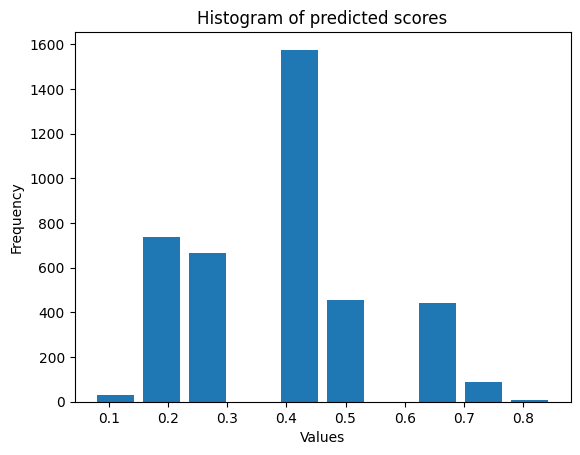

In [5]:
import matplotlib.pyplot as plt

plt.hist(raw_scores, rwidth=0.8, align="left")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of predicted scores")
plt.show()

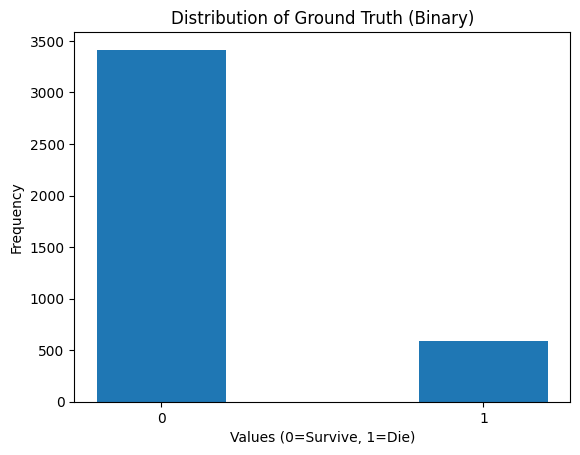

In [6]:
import matplotlib.pyplot as plt
import numpy as np
values, counts = np.unique(y, return_counts=True)

# Create a bar plot
plt.bar(values, counts, width=0.4)
plt.xticks(values, [0, 1])  # label the x-axis ticks as 0 and 1
plt.xlabel("Values (0=Survive, 1=Die)")
plt.ylabel("Frequency")
plt.title("Distribution of Ground Truth (Binary)")
plt.show()